In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib agg
from IPython.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

import jax
import jax.numpy as jnp
import numpy as np
import visualization
from data import standardize
from utils import results, experiments, settings, equioutput, evaluation, graphs
import global_settings
import os
import matplotlib

In [2]:
# standardized, rbf, 1 hl, 3 hn
## k=10: sinusoidal: same, izmailov: worse than 1024, regression2d: visually better, but spread worse.
## k=1024: sinusoidal: good, izmailov: good, regression2d: ok / good

# standardize, rbf, 1 hl, 16 hn
## k=10: sinusoidal: bad, izmailov:, regression2d:
## k=1024: sinusoidal: good, izmailov: good, regression2d:

# standardize, invd, 1 hl, 16 hn
## k=1024: sinusoidal: good, izmailov: good, regression2d:


### --> I should use k=1024
### invd/rbf?: not so much of a difference.

# --> test for multiple layers: better k=10 or k=1024...? --> better k=10
# for multiple layers it seems to be benefitial to choose small k...

tanh_planes = 2
k = 1024
sim = "rbf"

In [3]:
result = results.ResultSample.load_from_file(
    # 1 hl, 3 hn
    "/home/gw/data/experiments/master_thesis/results/1cd0fb4d70b0c0c9bc850afe49a45128.tar.gz"
    #"/home/gw/data/experiments/master_thesis/results/cbc8fa72832a535540fd3a72274bd1df.tar.gz"
    #"/home/gw/data/experiments/master_thesis/results/f542d3ebd37584291a4d8e9cef5b95f7.tar.gz"
    
    # 1 hl, 4 hn
    #"/home/gw/data/experiments/master_thesis/results/e99343eb8d643d1e9212b2fcab193df5.tar.gz"
    #"/home/gw/data/experiments/master_thesis/results/24b3fa55b428355bcb56dab1ae496025.tar.gz"
    #"/home/gw/data/experiments/master_thesis/results/c6835cefcab68b58b6f07158f1137c83.tar.gz"
    
    # 1 hl, 8 hn
    #"/home/gw/data/experiments/master_thesis/results/bda856d66fb907ce1c6b875bef0f81ec.tar.gz"
    #"/home/gw/data/experiments/master_thesis/results/.tar.gz"
    #"/home/gw/data/experiments/master_thesis/results/d1bf04dbd9713fde3f768b3a4a140f9f.tar.gz"
    
    # 1 hl, 16 hn
    #"/home/gw/data/experiments/master_thesis/results/a2290799ada4a6c8a77e4f9fbe2b7830.tar.gz"
    #"/home/gw/data/experiments/master_thesis/results/174575182edb6c5d42f99ca7354b9f40.tar.gz"
    #"/home/gw/data/experiments/master_thesis/results/6bc6f5992cbcf33821a675b0173d7209.tar.gz"
    
    # 1 hl, 64 hn
    #"/home/gw/data/experiments/master_thesis/results/c0bdb8cf7dc5e44f06229f7e3eb9ef01.tar.gz"
    #"/home/gw/data/experiments/master_thesis/results/4a377dd26278ec31ba042197a9d75496.tar.gz"
    #"/home/gw/data/experiments/master_thesis/results/187fc4046f8188e73b635ba70d61221d.tar.gz"
    
    # 1 hl, 128 hn
    #"/home/gw/data/experiments/master_thesis/results/ad0103a98b50d556206ac11f98572934.tar.gz"
    #"/home/gw/data/experiments/master_thesis/results/8566230fae98f8f6391996dac6b7fb7b.tar.gz"
    #"/home/gw/data/experiments/master_thesis/results/e1e6342a3cb97d38028adf85f3fae85c.tar.gz"
    
    # 2 hl, 3 hn
    #"/home/gw/data/experiments/master_thesis/results/3cd8dd0184d7cf6798001c36a05efb92.tar.gz"
    #"/home/gw/data/experiments/master_thesis/results/89478192c4d7fb7c0c138a6635f0ff04.tar.gz"
    #"/home/gw/data/experiments/master_thesis/results/3f20a27ee0828d865a36320f2af66afb.tar.gz"
    
    # 2 hl, 4 hn
    #"/home/gw/data/experiments/master_thesis/results/5fe59dd56f3ecc657fa49ac8b4ec4dce.tar.gz"
    #"/home/gw/data/experiments/master_thesis/results/f47e4647c414e39d47e2d5b79a59ce1e.tar.gz"
    #"/home/gw/data/experiments/master_thesis/results/ee1191f6065b8f88c88a62cffa269857.tar.gz"
    
    # 2 hl, 8hn
    #"/home/gw/data/experiments/master_thesis/results/37bccc0afc165ff842fbbeab926ab2f3.tar.gz"
    #"/home/gw/data/experiments/master_thesis/results/2afe0c254c0afa9dd1ba436f4be5affb.tar.gz"
    #"/home/gw/data/experiments/master_thesis/results/52a86ebd73aaa81538d2dccf80bd1b68.tar.gz"
    
    # 2 64
    #"/home/gw/data/experiments/master_thesis/results/1d80f57525a8b20212e940e2d9b40f95.tar.gz"
    
    # 4 hl, 4 hn
    #"/home/gw/data/experiments/master_thesis/results/1664a41abb8c2042a3a316cefd1c5e87.tar.gz"
)
experiment = experiments.FactoryExperiment(result.experiment_type, **{"settings": result.settings})()
print(experiment._settings)

SettingsExperimentSample(output_path='/home/ubuntu/data/experiments/master_thesis/results', dataset='sinusoidal', dataset_normalization='standardization', hidden_layers=1, hidden_neurons=3, activation='tanh', activation_last_layer='none', num_warmup=1024, statistic='reduced', statistic_p=0.99, samples_per_chain=1, identifiable_modes=3, pool_size=10, seed=0)


In [4]:
folder = os.path.join(global_settings.PATH_RESULTS, result.identifier)
file_name = os.path.join(folder, f"{result.identifier}_{tanh_planes}_{k}_{sim}.npy")
#file_name = os.path.join(folder, f"{result.identifier}_fixed.npy")
#file_name = "/home/gw/mt_code/notebooks/99_other/permutation_removal_history_0.pny.npy"
print(file_name)

samples_parameters_reduced = None
if os.path.exists(file_name):
    samples_parameters_reduced = jnp.load(file_name)
    print(samples_parameters_reduced.shape)

/home/gw/data/experiments/master_thesis/results/1cd0fb4d70b0c0c9bc850afe49a45128/1cd0fb4d70b0c0c9bc850afe49a45128_2_1024_rbf.npy
(1274, 10)


In [5]:
sequential_helper = equioutput.SequentialHelper(
    transformation=experiment._model_transformation,
    dataset=experiment._dataset
)
structured_sequential_samples_parameters = sequential_helper.structured_sequential_samples_parameters(
    samples_parameters=samples_parameters_reduced
    #samples_parameters=result.samples["parameters"]
)
symmetry_helper = equioutput.SymmetryHelper(structured_sequential_samples_parameters)

In [6]:
tmp_sequential_helper = equioutput.SequentialHelper(
    transformation=experiment._model_transformation,
    dataset=experiment._dataset
)
tmp_structured_sequential_samples_parameters = tmp_sequential_helper.structured_sequential_samples_parameters(
    samples_parameters=samples_parameters_reduced
)
tmp_symmetry_helper = equioutput.SymmetryHelper(tmp_structured_sequential_samples_parameters)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.98it/s]


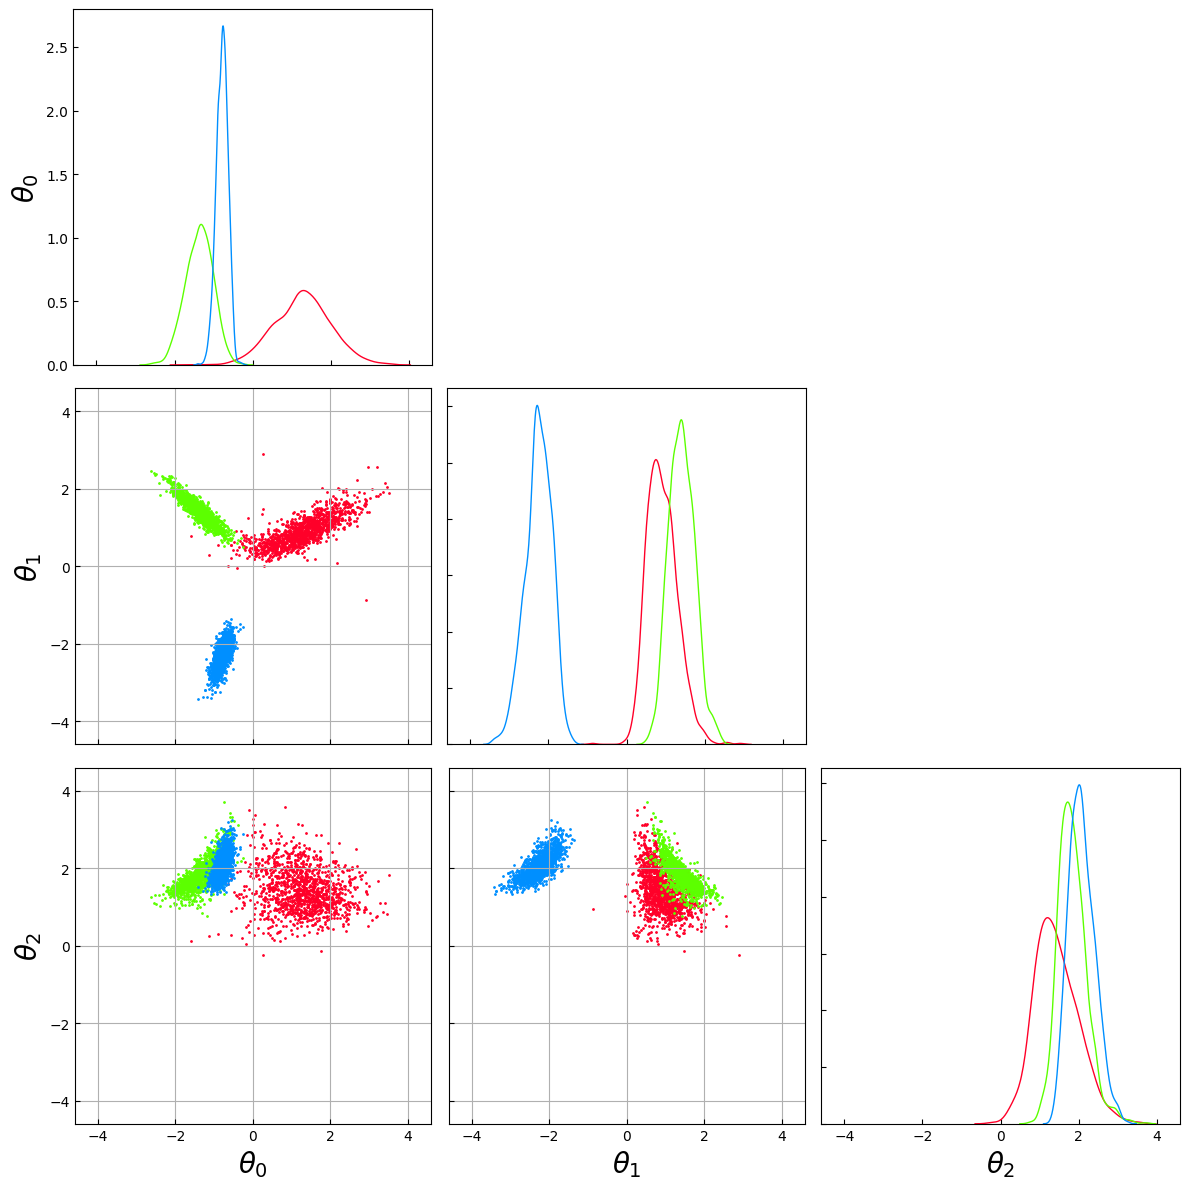

In [7]:
subspace_0 = symmetry_helper.hidden_layer_subspace(layer=0)
data_list = list(subspace_0.transpose(1, 0, 2))
figure = visualization.TriangleFigure(
    settings=settings.SettingsTriangleFigure(
        ax_width=4.0,
        ax_height=4.0,
        prefix=r"\theta",
        settings_scatter=settings.SettingsScatter(
            alpha=1.0,
            size=1.0
        ),
        label_size=20
    )
)
figure.plot(
    data_list=data_list
)

In [8]:
# todo: I have to normalize first the main part, and then by the same scale and shift the reduced part.
print("before", evaluation.spread(result.samples["parameters"]))
print("after", evaluation.spread(symmetry_helper._structured_sequential_samples_parameters.samples_parameters))

before 2.3616054
after 0.18318559


/home/gw/data/binaries/mt/lib/python3.10/site-packages/jax/_src/numpy/lax_numpy.py:1865: ComplexWarning: Casting complex values to real discards the imaginary part
  out = lax_internal._convert_element_type(out, dtype, weak_type=weak_type)


100%|██████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 59.32it/s]


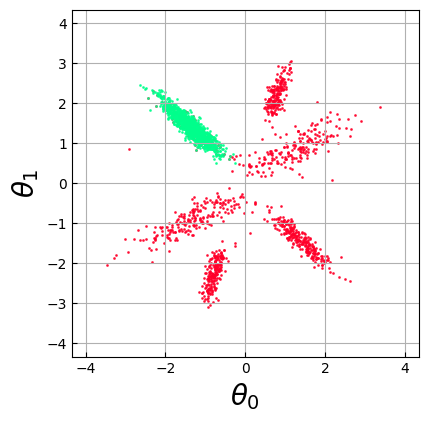

In [22]:
figure = visualization.TriangleFigure(
    settings=settings.SettingsTriangleFigure(
        ax_width=4.0,
        ax_height=4.0,
        prefix=r"\theta",
        settings_scatter=settings.SettingsScatter(
            alpha=0.8,
            size=1.0
        ),
        label_size=20,
        #cmap=matplotlib.cm.get_cmap("rainbow"),
        univariate=False
    )
)
figure.plot(
    data_list=[result.samples["parameters"][:, np.asarray([1, 4])], structured_sequential_samples_parameters.samples_parameters[:, np.asarray([1, 4])]]
)

In [21]:
figure._figure.savefig(os.path.join(global_settings.PATH_FIGURES, "second.png"), bbox_inches="tight", dpi=192, transparent=True)

/home/gw/data/binaries/mt/lib/python3.10/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.12 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/home/gw/data/binaries/mt/lib/python3.10/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0`, but please update your code.
  warnings.warn(msg, UserWarning)
/home/gw/data/binaries/mt/lib/python3.10/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


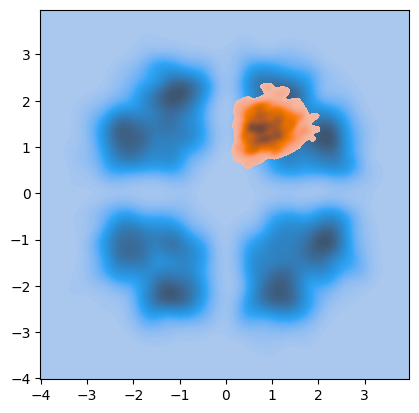

In [93]:
plot_data_x = jnp.concatenate([
    result.samples["parameters"][:, 3],
    result.samples["parameters"][:, 4],
    result.samples["parameters"][:, 5],
    result.samples["parameters"][:, 3],
])
plot_data_y = jnp.concatenate([
    result.samples["parameters"][:, 4],
    result.samples["parameters"][:, 5],
    result.samples["parameters"][:, 3],
    result.samples["parameters"][:, 5],
])
plot_data_x_red = jnp.concatenate([
    structured_sequential_samples_parameters.samples_parameters[:, 3],
])
plot_data_y_red = jnp.concatenate([
    structured_sequential_samples_parameters.samples_parameters[:, 4],
])

import seaborn as sns
figure = plt.figure()
ax = figure.add_subplot(1, 1, 1)
ax.set_aspect("equal")
sns.kdeplot(
    x=plot_data_x,
    y=plot_data_y,
    ax=ax, levels=128, fill=True,
    gridsize=128,
    bw=0.12,
    #palette="viridis",
    shade_lowest=True
)
sns.kdeplot(
    x=plot_data_x_red,
    y=plot_data_y_red,
    ax=ax, levels=128, fill=True,
    gridsize=64,
    bw=0.2,
    #palette="viridis",
)
figure

In [94]:
figure.savefig(os.path.join(global_settings.PATH_FIGURES, "kdeplot.png"), bbox_inches="tight", dpi=300, transparent=True)

samples_parameters_fs.shape (1274, 10)


100%|███████████████████████████████████████████| 1024/1024 [00:04<00:00, 239.42it/s]


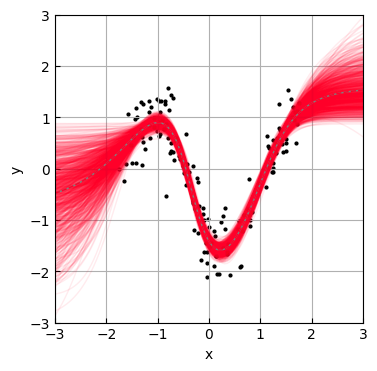

In [16]:
rng_key, rng_key_ = jax.random.split(jax.random.PRNGKey(0))
samples_parameters_fs = jax.random.permutation(rng_key_, structured_sequential_samples_parameters.samples_parameters)
print("samples_parameters_fs.shape", samples_parameters_fs.shape)

n = 2**10
if len(experiment._dataset.conditional_indices) > 1:
    n = 2**4

figure = visualization.RegressionFigure(
    settings=settings.SettingsRegressionFigure(
        settings_plot=settings.SettingsPlot(
            alpha=0.08,
            epistemic=False
        )
    )
)
figure.plot(
    dataset=experiment._dataset,
    transformation=experiment._model_transformation.apply_from_vector,
    parameters_list=[
        samples_parameters_fs[:n],
        #result.samples["parameters"][:]
    ],
    std=result.samples["std"].mean()
)

In [17]:
figure._figure.savefig(os.path.join(global_settings.PATH_FIGURES, "post_hoc_custom_fs.png"), bbox_inches="tight", dpi=300, transparent=True)

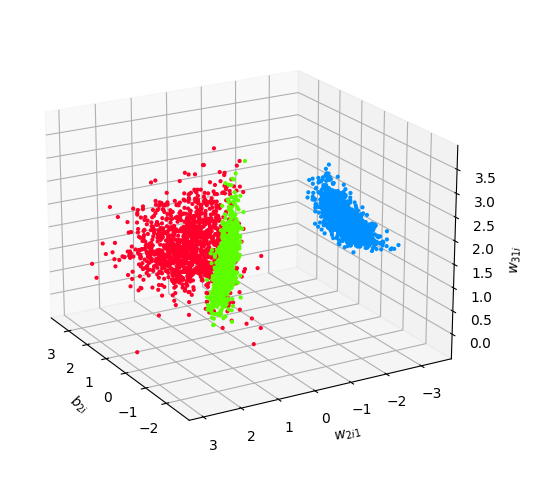

In [18]:
import matplotlib.pyplot as plt
import matplotlib
cmap = matplotlib.cm.get_cmap("gist_rainbow")

subspace_0 = symmetry_helper.hidden_layer_subspace(layer=0)

figure = plt.figure(figsize=(6, 6))
ax = figure.add_subplot(1, 1, 1, projection="3d")
for h in range(subspace_0.shape[-2]):
    color = cmap(1.0 * h / subspace_0.shape[-2])
    ax.scatter(subspace_0[:, h, 0], subspace_0[:, h, 1], subspace_0[:, h, 2], alpha=0.99, s=4, color=color)

#ax.scatter(0, 0, 0, alpha=0.99, s=100, c="black", marker='+')
#sample = 0
#ax.scatter(subspace_0[sample, 2, 0], subspace_0[sample, 2, 1], subspace_0[sample, 2, 2], alpha=0.99, s=100, color=color, marker='o')
#ax.scatter(-subspace_0[sample, 2, 0], -subspace_0[sample, 2, 1], -subspace_0[sample, 2, 2], alpha=0.99, s=100, color=color, marker='o')
#ax.plot(
#    [subspace_0[sample, 2, 0], -subspace_0[sample, 2, 0]],
#    [subspace_0[sample, 2, 1], -subspace_0[sample, 2, 1]],
#    [subspace_0[sample, 2, 2], -subspace_0[sample, 2, 2]], alpha=0.99, color=color)

ax.set_xlabel(r"$b_{2i}$")
ax.set_ylabel(r"$w_{2i1}$")
ax.set_zlabel(r"$w_{31i}$")

#ax.view_init(20, 210)
ax.view_init(20, 150)
figure

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from data import standardize

samples_gt = standardize(result.samples["parameters"])
samples_posthoc = standardize(structured_sequential_samples_parameters.samples_parameters)

In [122]:
def get_knn_sc_eigenvalues(samples, n=256):
    a = graphs.knn_graph(nodes=samples, k=4)
    d = graphs.degree_matrix(a)
    l = graphs.laplacian(a=a, d=d, normalized=True)
    eigenvalues, eigenvectors = graphs.spectrum(l=l, k=n, normalized=False)
    return eigenvalues, eigenvectors

In [123]:
lambdas_gt, _ = get_knn_sc_eigenvalues(samples_gt)
lambdas_posthoc, eigenvectors = get_knn_sc_eigenvalues(samples_posthoc)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1274/1274 [00:03<00:00, 399.13it/s]


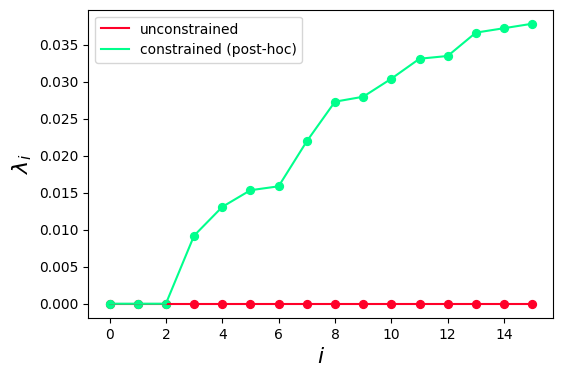

In [126]:
amount_1 = 256
amount_2 = 16
lambdas_indices_1 = np.arange(len(lambdas_gt[:amount_1]))
lambdas_indices_2 = np.arange(len(lambdas_gt[:amount_2]))
s=32
cm = matplotlib.cm.get_cmap("gist_rainbow")

figure = plt.figure(figsize=(6, 4))
"""
ax1 = figure.add_subplot(1, 2, 1)
ax1.set_xlabel(r"$i$")
ax1.set_ylabel(r"$\lambda_i$")
ax1.plot(lambdas_indices_1, lambdas_gt[:amount_1], label="unconstrained")
#ax1.plot(lambdas_indices_1, lambdas_online[:amount_1], label="constrained (online)")
ax1.plot(lambdas_indices_1, lambdas_posthoc[:amount_1], label="constrained (post-hoc)")
ax1.yaxis.label.set_size(16)
ax1.xaxis.label.set_size(16)
"""
ax2 = figure.add_subplot(1, 1, 1)
ax2.set_xlabel(r"$i$")
ax2.set_ylabel(r"$\lambda_i$")
ax2.scatter(lambdas_indices_2, lambdas_gt[:amount_2], marker="o", s=s, color=cm(1.0 * 0 / 2))
ax2.plot(lambdas_indices_2, lambdas_gt[:amount_2], label="unconstrained", color=cm(1.0 * 0 / 2))
#ax2.scatter(lambdas_indices_2, lambdas_online[:amount_2], marker="o", s=s)
#ax2.plot(lambdas_indices_2, lambdas_online[:amount_2])
ax2.scatter(lambdas_indices_2, lambdas_posthoc[:amount_2], marker="o", s=s, color=cm(1.0 * 1 / 2))
ax2.plot(lambdas_indices_2, lambdas_posthoc[:amount_2], label="constrained (post-hoc)", color=cm(1.0 * 1 / 2))
ax2.legend()
ax2.yaxis.label.set_size(16)
ax2.xaxis.label.set_size(16)

figure

In [125]:
figure.savefig(os.path.join(global_settings.PATH_FIGURES, "spectrum.png"), bbox_inches="tight", dpi=192, transparent=True)

# clustering

In [79]:
from sklearn.cluster import KMeans
k = 3
init_means = eigenvectors[:k, :k]
labels = KMeans(n_clusters=k, init=init_means, max_iter=1000, tol=1e-6).fit(jnp.asarray(eigenvectors[:, :k])).labels_
print(labels)

[2 1 2 ... 2 2 1]


/home/gw/data/binaries/mt/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1305: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params(X)


(10, 10)
(616, 10)
(648, 10)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.46it/s]


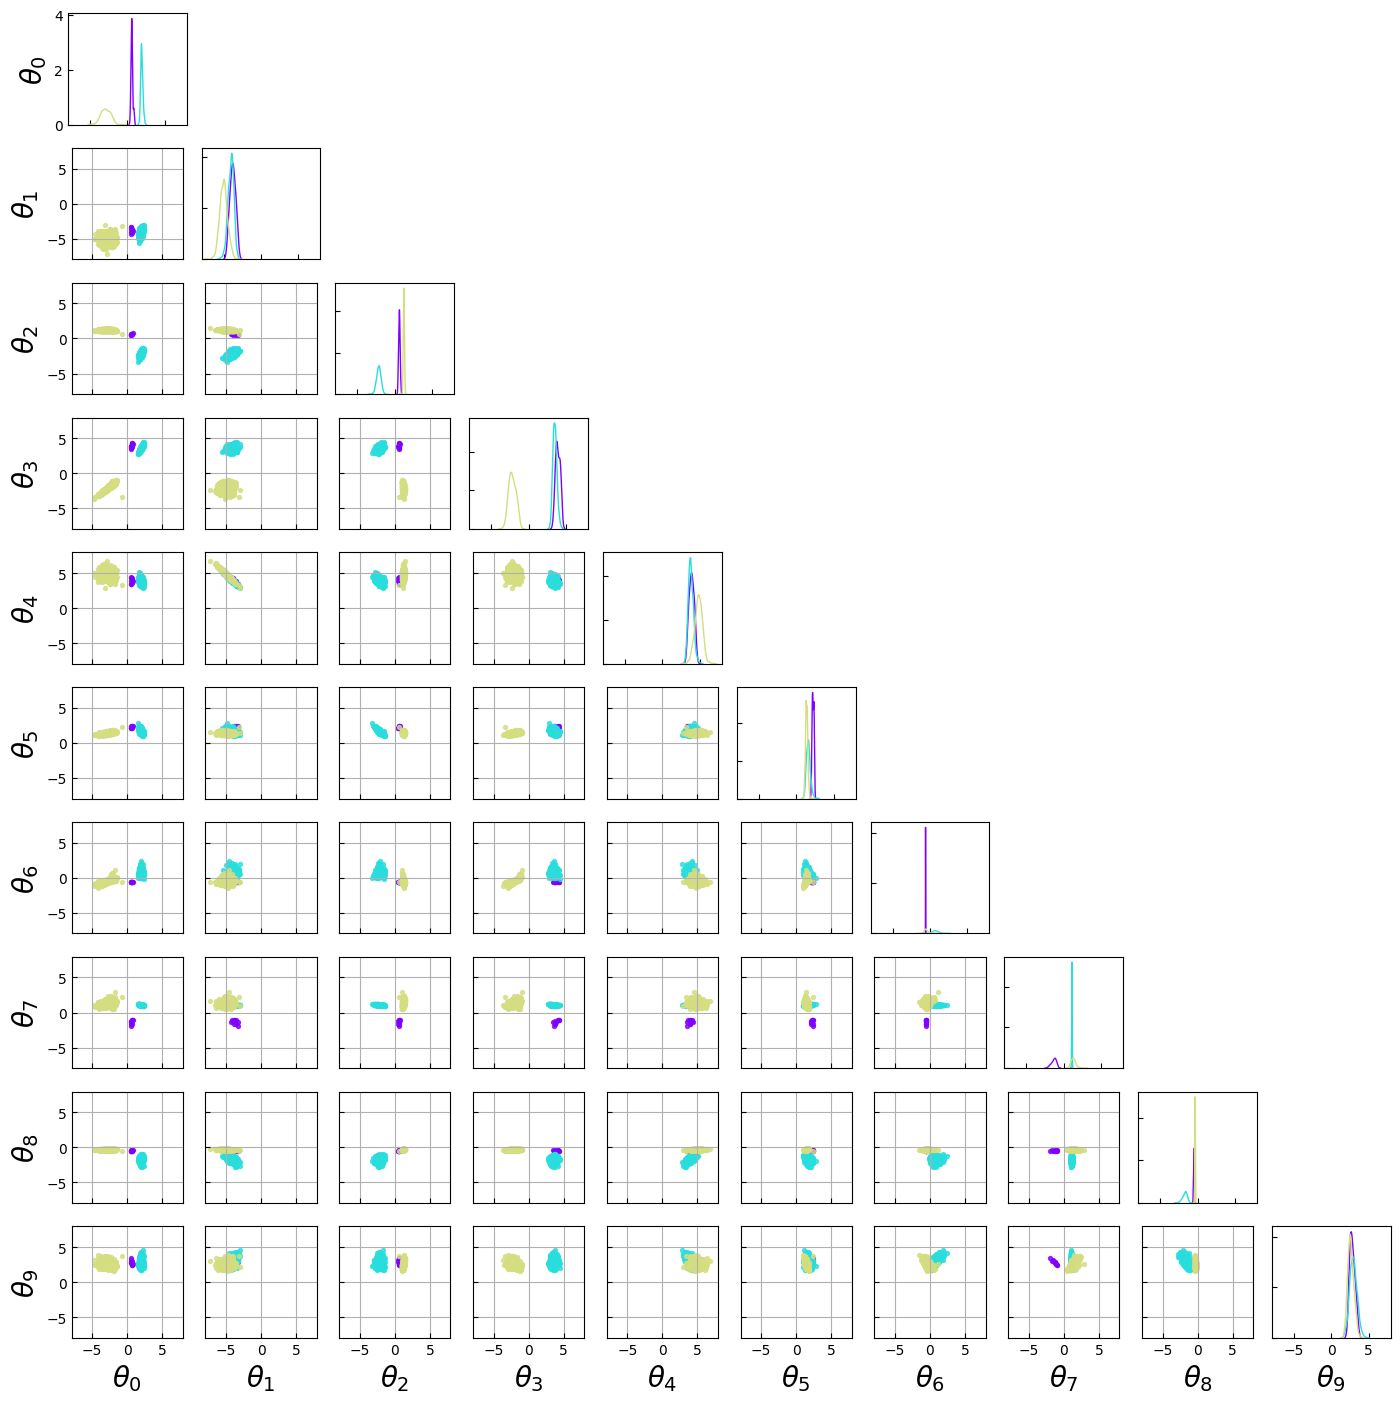

In [108]:
bla = structured_sequential_samples_parameters.samples_parameters

n = 2**10
if len(experiment._dataset.conditional_indices) > 1:
    n = 2**3

subsets = []
for i in range(k):
    selection = jnp.argwhere(labels == i).squeeze()
    subset = bla[np.array(selection)]
    print(subset.shape)
    subsets.append(subset)

bla = symmetry_helper._structured_sequential_samples_parameters.samples_parameters
figure = visualization.TriangleFigure(
    settings=settings.SettingsTriangleFigure(
        prefix=r"\theta",
        settings_scatter=settings.SettingsScatter(
            alpha=0.8,
            size=8.0
        ),
        label_size=20,
        cmap=matplotlib.cm.get_cmap("rainbow")
    )
)
figure.plot(
    data_list=subsets,
    triangle="lower"
)

In [109]:
figure._figure.savefig(os.path.join(global_settings.PATH_FIGURES, "post_hoc_custom_posterior_clustered.png"), bbox_inches="tight", dpi=192, transparent=True)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 648/648 [00:01<00:00, 327.10it/s]


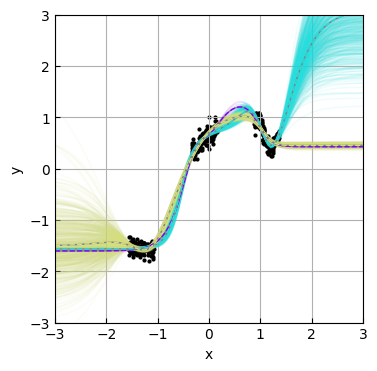

In [97]:
figure = visualization.RegressionFigure(
    settings=settings.SettingsRegressionFigure(
        settings_plot=settings.SettingsPlot(
            alpha=0.08,
            epistemic=False,
            cmap=matplotlib.cm.get_cmap("rainbow")
        )
    )
)
figure.plot(
    dataset=experiment._dataset,
    transformation=experiment._model_transformation.apply_from_vector,
    parameters_list=[subsets[0][:], subsets[1][:], subsets[2][:]],
    std=result.samples["std"].mean()
)

In [98]:
#figure._figure.savefig(os.path.join(global_settings.PATH_FIGURES, "fs_1.png"), bbox_inches="tight", dpi=192, transparent=True)
#figure._figure.savefig(os.path.join(global_settings.PATH_FIGURES, "fs_2.png"), bbox_inches="tight", dpi=192, transparent=True)
#figure._figure.savefig(os.path.join(global_settings.PATH_FIGURES, "fs_3.png"), bbox_inches="tight", dpi=192, transparent=True)
#figure._figure.savefig(os.path.join(global_settings.PATH_FIGURES, "fs_all.png"), bbox_inches="tight", dpi=192, transparent=True)